In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'borc': [1, 2, 4, 6],
    'risk': [1, 2.2, 5, 7.5],
})
df

,borc,risk
0,1,1.0
1,2,2.2
2,4,5.0
3,6,7.5


In [3]:
# Borç 15 olunca risk ne olur?

agirlik1 = 0.5
agirlik2 = 0.7

bias = 0.1

def risk_hesapla(borc):
    return agirlik1 * borc + agirlik2 * borc ** 2 + bias # f(x) = 0.5x + 0.7x^2 + 0.1 f(x) = ax + bx^2 + c

In [332]:
borc_15 = risk_hesapla(15)
borc_15

36.543

In [4]:
ilk_tahminler = []
for borc in df['borc']:
    risk_tahmini = risk_hesapla(borc)
    ilk_tahminler.append(risk_tahmini)
ilk_tahminler

[1.3, 3.9, 13.299999999999999, 28.3]

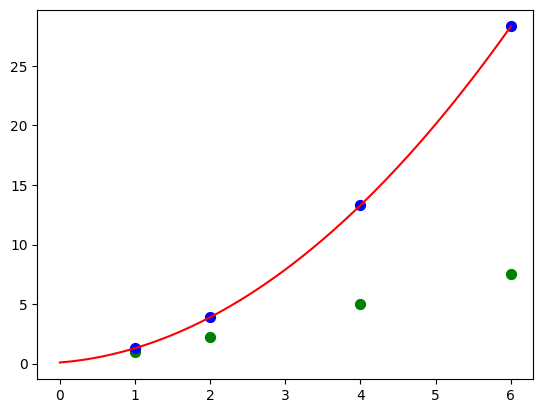

In [20]:
def grafigi_ciz(tahminler = ilk_tahminler):
    line = [risk_hesapla(i) for i in np.linspace(0, 6, 1000)]
    plt.plot(np.linspace(0, 6, 1000), line, c = 'red')
    plt.scatter(df['borc'], df['risk'], s = 50, c = 'green', label = "Doğru Değerler")
    plt.scatter(df['borc'], tahminler, s = 50, c = 'blue', label = "İlk Tahminler")
    plt.show()

grafigi_ciz()

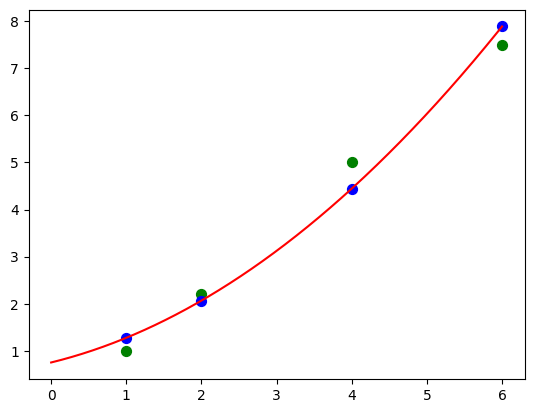

[1.2770000000000001, 2.067, 4.445, 7.8870000000000005]

In [331]:
agirlik1 = 0.391
agirlik2 = 0.133
bias = 0.753

# 0.39146656776604805 0.1332867793581989 0.7530513052953026
# float64 olarak kaydedersek model boyutumuz 24 byte olur
# float32 olarak kaydedersek model boyutumuz 12 byte olur
# parametre sayımız da 3 olur
ikinci_tahminler = []

for borc in df['borc']:
    risk_tahmini = risk_hesapla(borc)
    ikinci_tahminler.append(risk_tahmini)
grafigi_ciz(ikinci_tahminler)
ikinci_tahminler

In [392]:
class YapaySinirHucresi():
  def __init__(self, veriler, ogrenme_orani = 0.01, epoch = 1000):
    self.veriler = veriler
    self.ogrenme_orani = ogrenme_orani
    self.epoch = epoch
    np.random.seed(42)
    self.agirlik1 = np.random.randn()
    self.agirlik2 = np.random.randn()
    self.bias = np.random.randn()
    
    self.tahminler = [self.risk_hesapla(borc) for borc in self.veriler['borc']]
    self.hata = self.hata_hesapla(self.tahminler, self.veriler['risk'])
    print("Başlangıç Ağırlıkları: ", self.agirlik1, self.agirlik2, self.bias)
    print("İlk Tahminler: ", self.tahminler)
    print("Başlangıç Hatası: ", self.hata)

  def risk_hesapla(self, borc):
    return self.agirlik1 * borc + self.agirlik2 * borc ** 2 + self.bias
  
  def tahminleri_ve_hatayi_guncelle(self):
    self.tahminler = [self.risk_hesapla(borc) for borc in self.veriler['borc']]
    self.hata = self.hata_hesapla(self.tahminler, self.veriler['risk'])

  def hata_hesapla(self, tahminler, gercekler):
    # MSE Hesaplama (Mean Squared Error)
    # Türev ve gradyan hesaplamaları ile backpropagation için bu hata hesaplaması kullanılacak
    hata = 0
    for tahmin, gercek in zip(tahminler, gercekler):
      hata += (tahmin - gercek) ** 2
    return hata / len(tahminler)
  
  def yonlu_hata_hesaplama(self, tahmin, gercek):
    return tahmin - gercek

  def ogren(self):
    # random delta verisi ile ağırlıkları güncelleme
    for _ in range(self.epoch):
      hatalar = []
      for borc, risk in zip(self.veriler['borc'], self.veriler['risk']):
        tahmin = self.risk_hesapla(borc)
        hata = self.yonlu_hata_hesaplama(tahmin, risk)
        hatalar.append(hata)
        
      hatalarin_ortalamasi = sum(hatalar) / len(hatalar)
      random_delta1 = np.random.randn()
      self.agirlik1 += (hatalarin_ortalamasi * random_delta1 * self.ogrenme_orani)
      random_delta2 = np.random.randn()
      self.agirlik2 += (hatalarin_ortalamasi * random_delta2 * self.ogrenme_orani)
      random_delta3 = np.random.randn()
      self.bias += (hatalarin_ortalamasi * random_delta3 * self.ogrenme_orani)
    print("Ağırlıklar: ", self.agirlik1, self.agirlik2, self.bias)
    self.tahminleri_ve_hatayi_guncelle()
    print("Hata: ", self.hata)

  def grafigi_ciz(self):
    line = [self.risk_hesapla(i) for i in np.linspace(0, 6, 1000)]
    plt.plot(np.linspace(0, 6, 1000), line, c = 'red')
    plt.scatter(self.veriler['borc'], self.veriler['risk'], s = 50, c = 'green', label = "Doğru Değerler")
    plt.scatter(self.veriler['borc'], self.tahminler, s = 50, c = 'blue', label = "İlk Tahminler")
    plt.show()

  def kaydet(self, dosya_adi):
    with open(dosya_adi, 'w') as file:
      file.write(str(self.agirlik1) + '\n')
      file.write(str(self.agirlik2) + '\n')
      file.write(str(self.bias) + '\n')

  def yukle(self, dosya_adi):
    with open(dosya_adi, 'r') as file:
      self.agirlik1 = float(file.readline())
      self.agirlik2 = float(file.readline())
      self.bias = float(file.readline())
      
      print("Yükleme Başarılı")
      print("Ağırlıklar: ", self.agirlik1, self.agirlik2, self.bias)
      self.tahminleri_ve_hatayi_guncelle()
      
    

Başlangıç Ağırlıkları:  0.4967141530112327 -0.13826430117118466 0.6476885381006925
İlk Tahminler:  [1.0061383899407406, 1.0880596394384192, 0.4223163314066687, -1.3495413859945589]
Başlangıç Hatası:  25.126504889353374


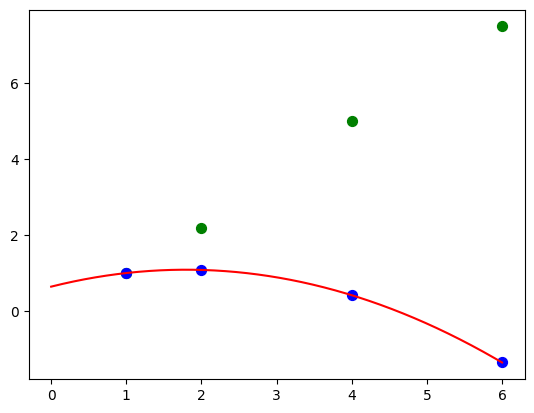

In [393]:
sinir_hucresi = YapaySinirHucresi(df, epoch=2000)
sinir_hucresi.grafigi_ciz()

Ağırlıklar:  0.3914753753081233 0.13330837917407962 0.7530606270177795
Hata:  0.13888120789559338


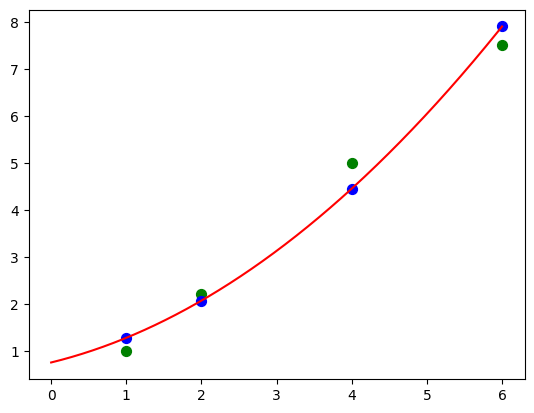

In [394]:
sinir_hucresi.ogren()
sinir_hucresi.grafigi_ciz()

In [399]:
sinir_hucresi.kaydet("model.txt")

Başlangıç Ağırlıkları:  0.4967141530112327 -0.13826430117118466 0.6476885381006925
İlk Tahminler:  [1.0061383899407406, 1.0880596394384192, 0.4223163314066687, -1.3495413859945589]
Başlangıç Hatası:  25.126504889353374


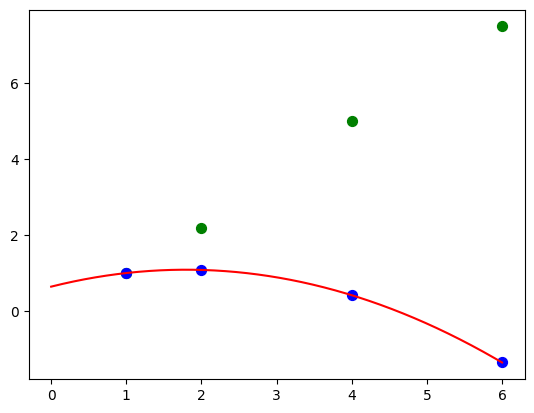

In [396]:
sinir_huresi_2 = YapaySinirHucresi(df)
sinir_huresi_2.grafigi_ciz()

Yükleme Başarılı
Ağırlıklar:  0.3914753753081233 0.13330837917407962 0.7530606270177795


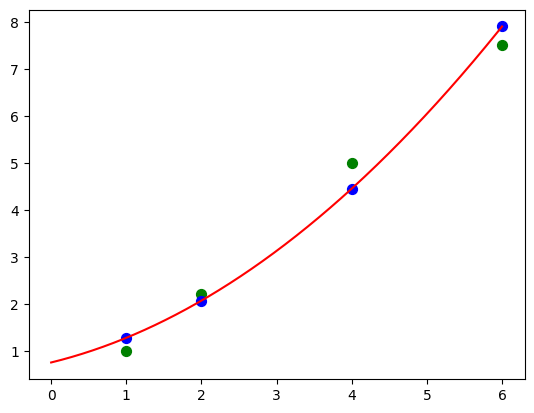

In [400]:
sinir_huresi_2.yukle("model.txt")
sinir_huresi_2.grafigi_ciz()